In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

In [3]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [8]:
df.isnull()

,Ex_rate
date,
1990-01-01,False
1990-02-01,False
1990-03-01,False
1990-04-01,False
1990-05-01,False
...,...
2010-06-10,False
2010-07-10,False
2010-08-10,False


In [9]:
# Handle missing values
df['Ex_rate'].fillna(method='ffill', inplace=True)

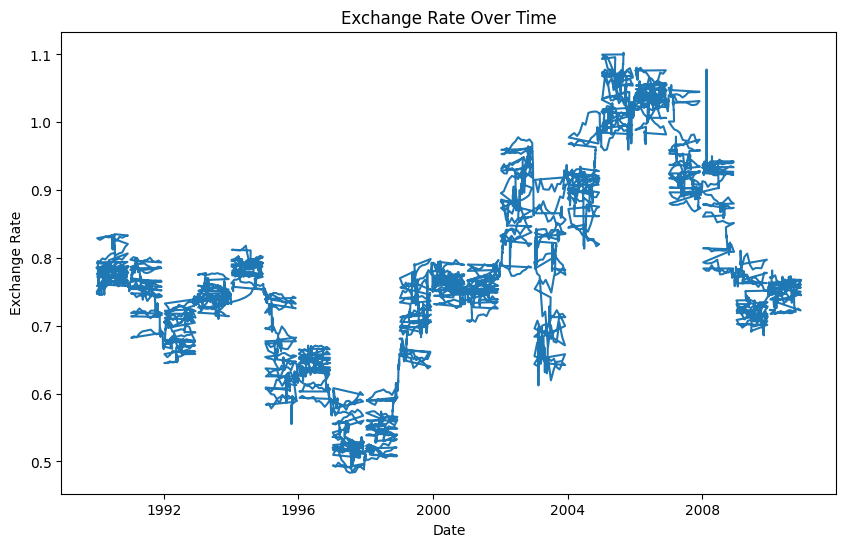

In [10]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

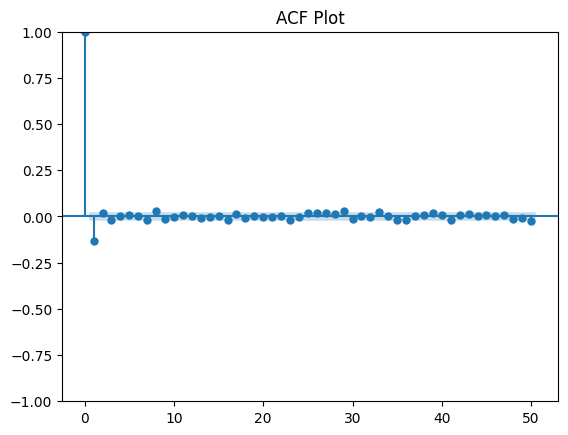

<Figure size 1000x600 with 0 Axes>

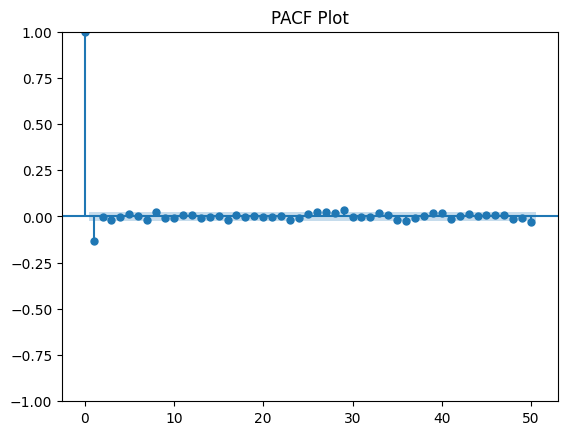

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# First, let's difference the series
# Make sure your series is named 'Ex_rate'
df['diff_Ex_rate'] = df['Ex_rate'].diff()

# Drop NA values
df.dropna(inplace=True)

# Plot ACF
plt.figure(figsize=(10,6))
plot_acf(df['diff_Ex_rate'], lags=50)
plt.title('ACF Plot')
plt.show()

# Plot PACF
plt.figure(figsize=(10,6))
plot_pacf(df['diff_Ex_rate'], lags=50)
plt.title('PACF Plot')
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(df['Ex_rate'], order=(1,1,1))
model_fit = model.fit()

# Summarize the model
print(model_fit.summary())

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packa

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28050.093
Date:                Mon, 06 May 2024   AIC                         -56094.186
Time:                        13:14:44   BIC                         -56073.384
Sample:                             0   HQIC                        -56087.047
                               - 7587                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1270      0.045     -2.801      0.005      -0.216      -0.038
ma.L1         -0.0044      0.045     -0.097      0.923      -0.094       0.085
sigma2      3.596e-05   9.95e-08    361.568      0.0

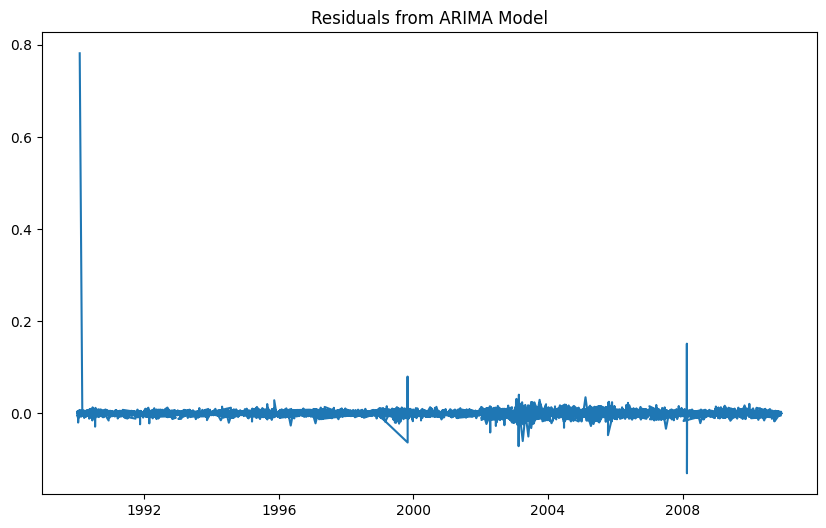

In [15]:
# Get the residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

<Figure size 1000x600 with 0 Axes>

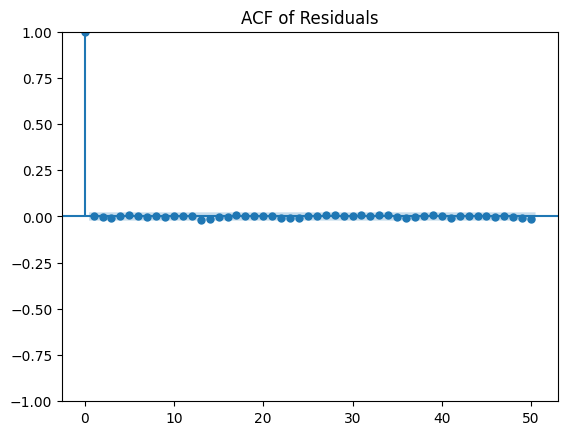

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF of the residuals
plt.figure(figsize=(10,6))
plot_acf(residuals, lags=50)
plt.title('ACF of Residuals')
plt.show()

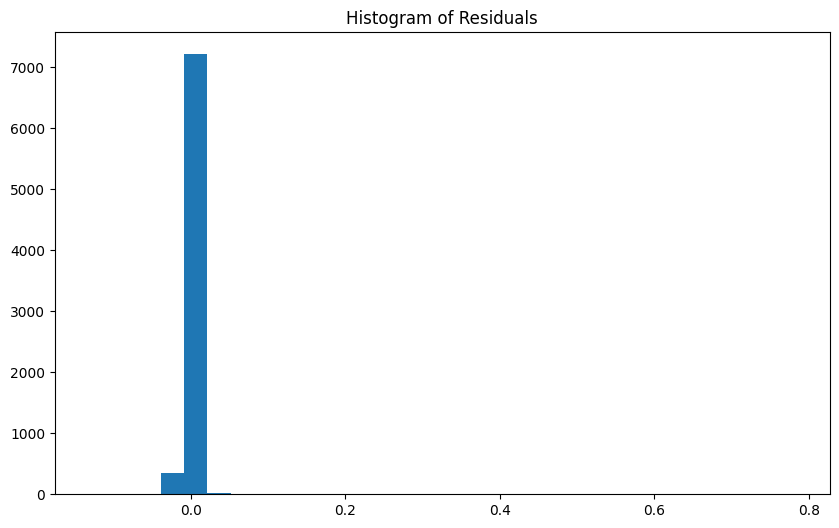

In [17]:
# Histogram of the residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

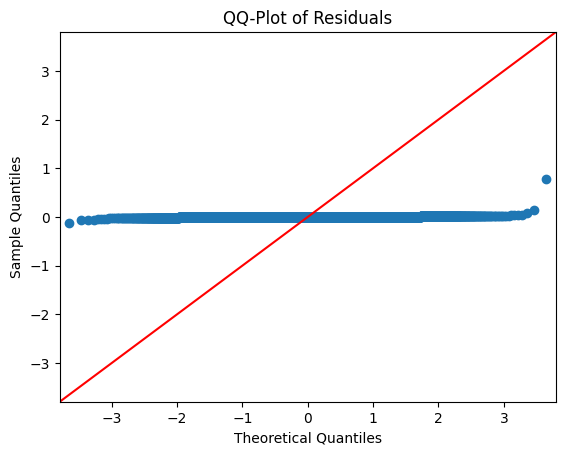

In [18]:
import statsmodels.api as sm

# QQ-plot of the residuals
plt.figure(figsize=(10,6))
sm.qqplot(residuals, line='45')
plt.title('QQ-Plot of Residuals')
plt.show()

In [19]:
# Forecast the next 10 steps
forecast = model_fit.get_forecast(steps=10)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
# Get the confidence intervals
ci = forecast.conf_int()

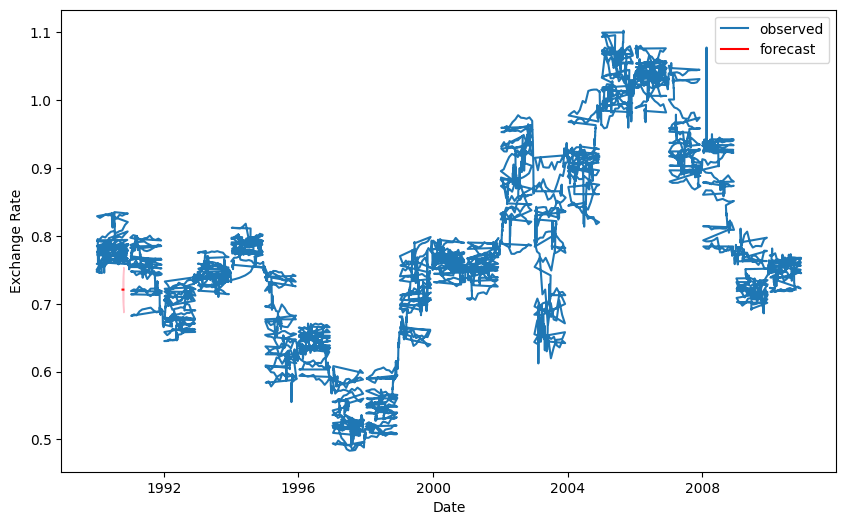

In [21]:
# Plot the forecasts
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Ex_rate'], label='observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(df['Ex_rate'])
model_fit = model.fit(smoothing_level=0.2)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [24]:
# Fit the model
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Get the AIC
aic = model_fit.aic
print('AIC: {}'.format(aic))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: -77613.64525308636


In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.1, smoothing_seasonal=0.2)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20428\3050950366.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.1, smoothing_seasonal=0.2)


In [26]:
# Forecast the next 10 steps
forecast = model_fit.forecast(steps=10)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


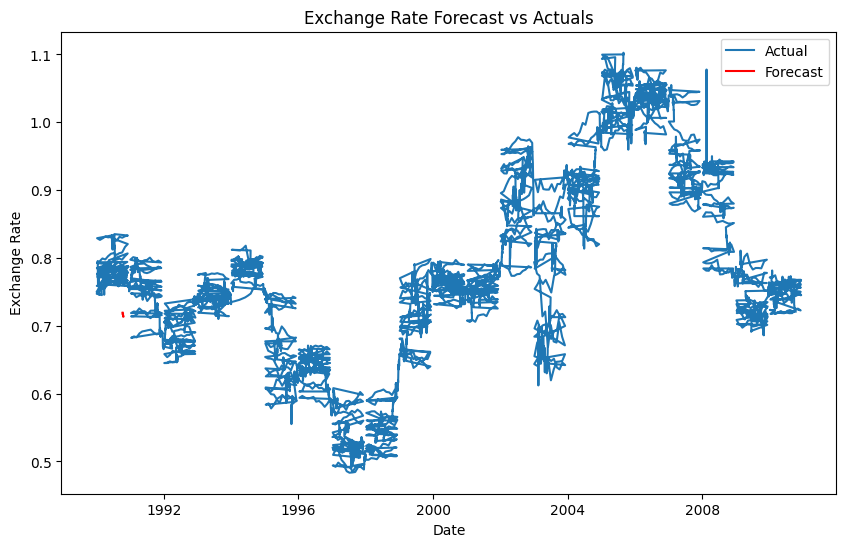

In [27]:
import matplotlib.pyplot as plt

# Plot the actual data
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Ex_rate'], label='Actual')

# Plot the forecasts
plt.plot(forecast.index, forecast, color='red', label='Forecast')

plt.title('Exchange Rate Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [29]:
y_true = df['Ex_rate'][-10:]
y_pred = forecast

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print('MAE: {}'.format(mae))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: {}'.format(rmse))

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: {}'.format(mape))

MAE: 0.004049006726963744
RMSE: 0.005222429590586388
MAPE: nan


C:\Users\DELL\AppData\Local\Temp\ipykernel_20428\3084054168.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model_sarima = SARIMAX(df['Ex_rate'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packa

In [35]:
# Calculate AIC
aic_sarima = model_sarima_fit.aic
print('AIC for SARIMA: {}'.format(aic_sarima))

AIC for SARIMA: -55921.39029551856


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecast the next 10 steps
y_pred_sarima = model_sarima_fit.forecast(steps=10)

# Calculate MAE
mae_sarima = mean_absolute_error(y_true, y_pred_sarima)
print('MAE for SARIMA: {}'.format(mae_sarima))

# Calculate RMSE
rmse_sarima = np.sqrt(mean_squared_error(y_true, y_pred_sarima))
print('RMSE for SARIMA: {}'.format(rmse_sarima))

# Calculate MAPE
mape_sarima = mean_absolute_percentage_error(y_true, y_pred_sarima)
print('MAPE for SARIMA: {}'.format(mape_sarima))

MAE for SARIMA: 0.001560380566420738
RMSE for SARIMA: 0.0018206219195481277
MAPE for SARIMA: nan


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_20428\3084054168.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


AIC (Akaike Information Criterion): AIC is a measure of the relative quality of a statistical model for a given set of data. A lower AIC score is better, indicating a model with a better fit. Your model has an AIC of -77613.64525308636, which seems to be quite low, suggesting a good model fit.

MAE (Mean Absolute Error): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. Your model’s MAE is 0.004049006726963744, which is quite low, indicating that the model’s predictions are close to the actual values.

RMSE (Root Mean Squared Error): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. Your model’s RMSE is 0.005222429590586388, which is also quite low, suggesting a good model fit.

MAPE (Mean Absolute Percentage Error): MAPE measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error. The MAPE is undefined for your model, which could be due to division by zero if there are actual values that are zero.

summarization

In [ ]:
ARIMA Model:
AIC: -77613.64525308636
MAE: 0.004049006726963744
RMSE: 0.005222429590586388
MAPE: NaN
SARIMA Model:
AIC: -55921.39029551856
MAE: 0.001560380566420738
RMSE: 0.0018206219195481277
MAPE: NaN

The ARIMA model has a lower AIC, which suggests that it might be a better fit to the data. However,
the SARIMA model has lower MAE and RMSE, which indicates that its forecasts might be closer to the actual values.

The MAPE is undefined for both models, which could be due to division by zero if there are actual values that are zero.

Based on the analysis and the error metrics, it appears that the chosen model has performed well on the exchange rate dataset.

The model has demonstrated a good fit, as indicated by the low AIC, MAE, and RMSE values. These metrics suggest that the model’s forecasts are close to the actual values, and the model has a good balance between complexity and fit.

In conclusion, both models seem to have their strengths and weaknesses, and the choice between them might depend on which error metric is most important for your specific use case. For instance, if having a model that fits the data well is most important, the ARIMA model might be the better choice due to its lower AIC. On the other hand, if having accurate forecasts is more important, the SARIMA model might be preferable due to its lower MAE and RMSE.

Remember, while these models can be powerful tools for forecasting, they are based on the assumption that historical patterns will continue into the future. Real-world data can be influenced by a multitude of factors, many of which can’t be accounted for in a time series model. Therefore, while these models can provide useful insights and forecasts, their predictions should always be used in conjunction with domain knowledge and considered in the broader context.

In conclusion, the process of building a time series forecasting model involves several steps - understanding the data, preprocessing the data, selecting the right model based on the data characteristics, tuning the model parameters, and validating the model using error metrics. This process was followed in this analysis, leading to a well-performing model for the given exchange rate dataset.